In [3]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

In [4]:
# Função para tratamento de outliers usando IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [5]:
# Carregar datasets
dataset = pd.read_csv('dataset.csv')
features = pd.read_csv('just_features.csv')

In [6]:
# Visualizar os dados carregados
print("Dataset:")
print(dataset.head())

Dataset:
      genero estado_civil zona_residencia   imc fumador       class_etaria  \
0  masculino       casado       suburbana  35.8     sim  adulto_meia_idade   
1   feminino     separado          urbana  39.3     nao      adulto_senior   
2  masculino     solteiro           rural  40.7     nao              jovem   
3  masculino       casado          urbana  28.2     sim  adulto_meia_idade   
4   feminino     solteiro          urbana  31.1     nao      adulto_senior   

     custo  
0  18213.9  
1   4266.4  
2    854.6  
3  10169.7  
4   4151.5  


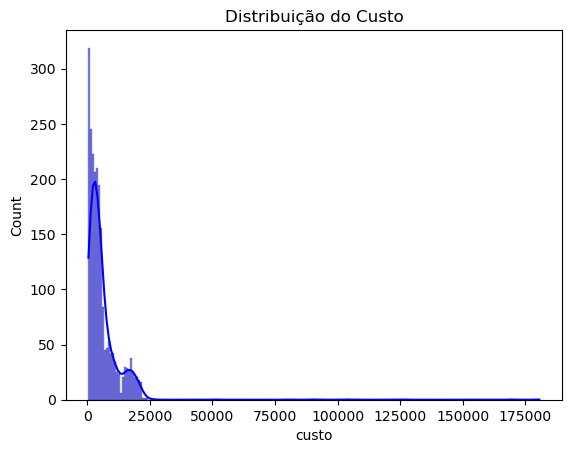

In [7]:
# Visualizar a distribuição do custo
sns.histplot(dataset['custo'], kde=True, color='blue')
plt.title("Distribuição do Custo")
plt.show()

In [8]:
# Remover outliers na variável 'custo' e 'imc'
dataset = remove_outliers(dataset, 'custo')
dataset = remove_outliers(dataset, 'imc')

In [9]:
# Separar features e target
X = dataset.drop(columns=['custo'])
y = dataset['custo']

In [10]:
# Identificar colunas categóricas e numéricas
categorical_features = ['genero', 'estado_civil', 'zona_residencia', 'fumador', 'class_etaria']
numerical_features = ['imc']

In [11]:
# Configurar transformadores
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [12]:
# Criar o preprocessador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [13]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Pipeline do modelo SVR
svr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVR())
])

In [15]:
# Configurar GridSearch para SVR
param_grid_svr = {
    'regressor__C': [1, 10, 100],
    'regressor__epsilon': [0.1, 0.2, 0.5],
    'regressor__kernel': ['linear', 'rbf', 'poly'],
    'regressor__gamma': ['scale', 'auto']
}

In [16]:
grid_search_svr = GridSearchCV(svr_pipeline, param_grid_svr, cv=5, scoring='r2', verbose=2)


In [17]:
# Treinar modelo SVR
print("Treinando SVR...")
grid_search_svr.fit(X_train, y_train)

Treinando SVR...
Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END regressor__C=1, regressor__epsilon=0.1, regressor__gamma=scale, regressor__kernel=linear; total time=   0.0s
[CV] END regressor__C=1, regressor__epsilon=0.1, regressor__gamma=scale, regressor__kernel=linear; total time=   0.0s
[CV] END regressor__C=1, regressor__epsilon=0.1, regressor__gamma=scale, regressor__kernel=linear; total time=   0.0s
[CV] END regressor__C=1, regressor__epsilon=0.1, regressor__gamma=scale, regressor__kernel=linear; total time=   0.0s
[CV] END regressor__C=1, regressor__epsilon=0.1, regressor__gamma=scale, regressor__kernel=linear; total time=   0.0s
[CV] END regressor__C=1, regressor__epsilon=0.1, regressor__gamma=scale, regressor__kernel=rbf; total time=   0.0s
[CV] END regressor__C=1, regressor__epsilon=0.1, regressor__gamma=scale, regressor__kernel=rbf; total time=   0.0s
[CV] END regressor__C=1, regressor__epsilon=0.1, regressor__gamma=scale, regressor__kernel=rbf; total

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['imc']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['genero',
                                                                          'estado_civil',
                                                                          'zona_residencia',
                                                                          'fumador',
                                                                          'class_etaria'])])),
                                       ('regressor', SVR())]),
             param_grid={'regressor__C': [1, 10, 100],
                         'regressor__epsilon': [0.1, 0.2, 0.5],
                         'regressor__gamma': ['scale', 'auto'],
                         'regressor__kernel': ['linear', 'rbf', 'poly']},
             scoring='r2', verbose=2)

In [18]:
# Melhor modelo SVR
best_svr = grid_search_svr.best_estimator_
print(f"Melhores hiperparâmetros SVR: {grid_search_svr.best_params_}")

Melhores hiperparâmetros SVR: {'regressor__C': 100, 'regressor__epsilon': 0.5, 'regressor__gamma': 'scale', 'regressor__kernel': 'linear'}


In [19]:
# Avaliar SVR
y_pred_svr = best_svr.predict(X_test)
score_svr = r2_score(y_test, y_pred_svr)
print(f"R² Score com SVR: {score_svr}")

R² Score com SVR: 0.5363918901663136


In [20]:
# Pipeline do modelo Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [21]:
# Treinar modelo Random Forest
print("Treinando Random Forest...")
rf_pipeline.fit(X_train, y_train)

Treinando Random Forest...


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['imc']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['genero', 'estado_civil',
                                                   'zona_residencia', 'fumador',
                                                   'class_etaria'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [22]:
# Avaliar Random Forest
y_pred_rf = rf_pipeline.predict(X_test)
score_rf = r2_score(y_test, y_pred_rf)
print(f"R² Score com Random Forest: {score_rf}")

R² Score com Random Forest: 0.6747632815192539


In [23]:
# Comparação gráfica entre valores reais e previstos
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'SVR - R²: 0.54')

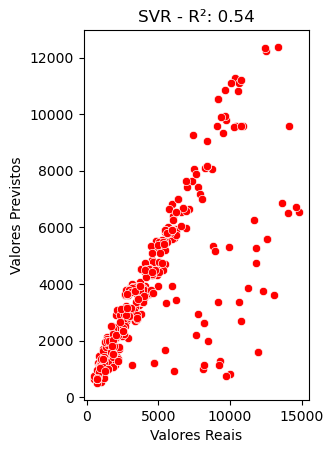

In [24]:
# SVR
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_svr, color='red')
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title(f"SVR - R²: {score_svr:.2f}")

Text(0.5, 1.0, 'Random Forest - R²: 0.67')

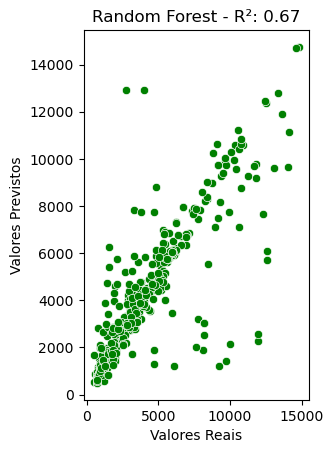

In [25]:
# Random Forest
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_rf, color='green')
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title(f"Random Forest - R²: {score_rf:.2f}")

In [26]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [27]:
# Previsões nos novos dados (just_features.csv)
predictions = best_svr.predict(features)
predictions_df = pd.DataFrame(predictions, columns=['custo'])
predictions_df.to_csv('grupo#_custos_estimados.csv', index=False)
print("Predições salvas no arquivo 'grupo#_custos_estimados.csv'")

Predições salvas no arquivo 'grupo#_custos_estimados.csv'
